In [1]:
import csv
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
data = []
with open('C:/Users/User/Desktop/csv/PytorchGen-master/original_data/creditcard_1_train_no_label.csv') as csvfile:
    csv_reader = csv.reader(csvfile)  # 使用csv.reader讀取csvfile中的檔案
    birth_header = next(csv_reader)  # 讀取第一行每一列的標題
    for row in csv_reader:  # 將csv 檔案中的資料儲存到birth_data中
        data.append(row)

data = [[float(x) for x in row] for row in data]  # 將資料從string形式轉換為float形式

data = np.array(data)  # 將list陣列轉化成array陣列便於檢視資料結構

data
data.shape

(492, 30)

In [3]:
len(data)
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['V14', 'V4', 'V10', 'V17', 'Time', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23']

df

,V14,V4,V10,V17,Time,V12,V26,Amount,V21,V8,...,V13,V25,V24,V18,V2,V1,V5,V15,V9,V23
0,-0.486750,0.289200,-0.282330,-0.393922,-0.247642,-0.310684,0.037754,-0.193722,0.094555,0.144351,...,-0.060452,0.008706,0.053636,-0.002294,0.135631,-0.128532,-0.043418,0.043066,-0.259929,-0.107764
1,-0.192397,0.165674,-0.085308,0.082249,-0.247328,-0.054504,-0.030431,0.189954,0.120816,-0.008240,...,0.068730,0.055245,-0.049243,0.210910,-0.221716,-0.168832,0.112307,0.221228,-0.025224,0.316836
2,-0.167245,0.168680,-0.155288,-0.664896,-0.228307,-0.701909,-0.114240,0.141734,-0.052941,-0.042885,...,0.002341,-0.030980,-0.014648,-0.320343,0.122150,-0.128043,-0.068195,-0.077324,-0.022153,0.039353
3,-0.768027,0.193941,-0.489101,-1.750109,-0.216275,-1.167150,-0.138471,0.056706,0.104797,-0.027163,...,0.018739,0.049827,-0.008980,-0.628238,0.094113,-0.243471,-0.093556,-0.000846,-0.023047,-0.101075
4,-0.689627,0.342310,-0.249236,0.934647,-0.213734,-0.493429,0.119810,-0.151326,-0.068375,-0.053049,...,0.148762,0.294409,-0.273575,0.372107,0.210310,0.066902,0.299673,-0.037555,-0.120257,-0.151948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.756022,0.126696,-0.569201,-0.635560,0.144855,-0.579770,0.166560,0.171350,0.142064,0.071744,...,-0.125453,0.106220,-0.049425,-0.161184,0.077837,-0.107352,-0.129828,0.044391,-0.193706,0.146979
488,-0.591118,0.102309,-0.329187,-0.454601,0.145833,-0.331741,0.156238,-0.159145,0.067903,0.024832,...,-0.080495,0.103129,-0.013595,-0.084495,0.089288,0.074855,0.036412,-0.067921,-0.105657,-0.034067
489,-0.460446,0.034121,-0.352799,-0.700090,0.145852,-0.297335,0.099624,0.073447,0.137200,0.125374,...,-0.042546,-0.146414,0.005359,-0.062283,0.077886,-0.038373,-0.092928,-0.078849,-0.061034,0.043554
490,-0.727853,0.131596,-0.534375,-0.641695,0.148783,-0.538410,0.128105,0.143008,0.106561,0.109542,...,-0.114516,-0.065012,-0.030788,-0.181131,0.040083,-0.172706,-0.069766,0.015584,-0.153077,-0.105665


In [4]:
print(len(df.values))
type(df.values)


492


numpy.ndarray

In [5]:
class Smote:
    def __init__(self,samples,N=10,k=5):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/100)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        print('neighbors',neighbors)
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            if self.newindex != 492:
                self.newindex += 1
            elif (self.newindex == 492):
                self.newindex = 0

In [6]:
# a=np.array(df)
a = data
N_100_K_5=Smote(a,N=100,k=5)
N_100_K_5.over_sampling()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


array([[-0.47397814,  0.23874782, -0.30470808, ...,  0.04889987,
        -0.22944365, -0.07314767],
       [-0.01563512,  0.10711122, -0.0157904 , ...,  0.24199299,
        -0.03899347,  0.1015091 ],
       [-0.16724549,  0.16868026, -0.1552885 , ..., -0.07732387,
        -0.02215347,  0.03935308],
       ...,
       [-0.4478842 ,  0.09378116, -0.35640263, ...,  0.00192467,
        -0.1066298 ,  0.0291614 ],
       [-0.72797245,  0.13177127, -0.52464607, ...,  0.0287009 ,
        -0.14368207, -0.08821854],
       [-0.21667372,  0.00965691, -0.11419192, ..., -0.08672413,
         0.04332296,  0.02417128]])

In [7]:
N_100_K_8=Smote(a,N=100,k=8)
N_100_K_8.over_sampling()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius=1.0)


array([[-0.48661389,  0.28866141, -0.28256904, ...,  0.04312848,
        -0.25960347, -0.10739431],
       [-0.19239733,  0.16567393, -0.08530844, ...,  0.22122762,
        -0.02522442,  0.31683638],
       [-0.32840887,  0.13729764, -0.21213856, ..., -0.05779929,
        -0.05738401,  0.00281904],
       ...,
       [-0.45483442,  0.11659661, -0.34575415, ...,  0.01642173,
        -0.14185643,  0.00336901],
       [-0.74955471,  0.16356059, -0.52408371, ...,  0.0790527 ,
        -0.1607343 , -0.05859605],
       [-0.163254  ,  0.03729245, -0.10155888, ...,  0.03167987,
         0.0133537 , -0.05602759]])

In [15]:
N_150_K_10=Smote(a,N=150,k=10)
data_solve = N_150_K_10.over_sampling().copy()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)


In [16]:
data_solve.shape

(492, 30)

KeyboardInterrupt: 

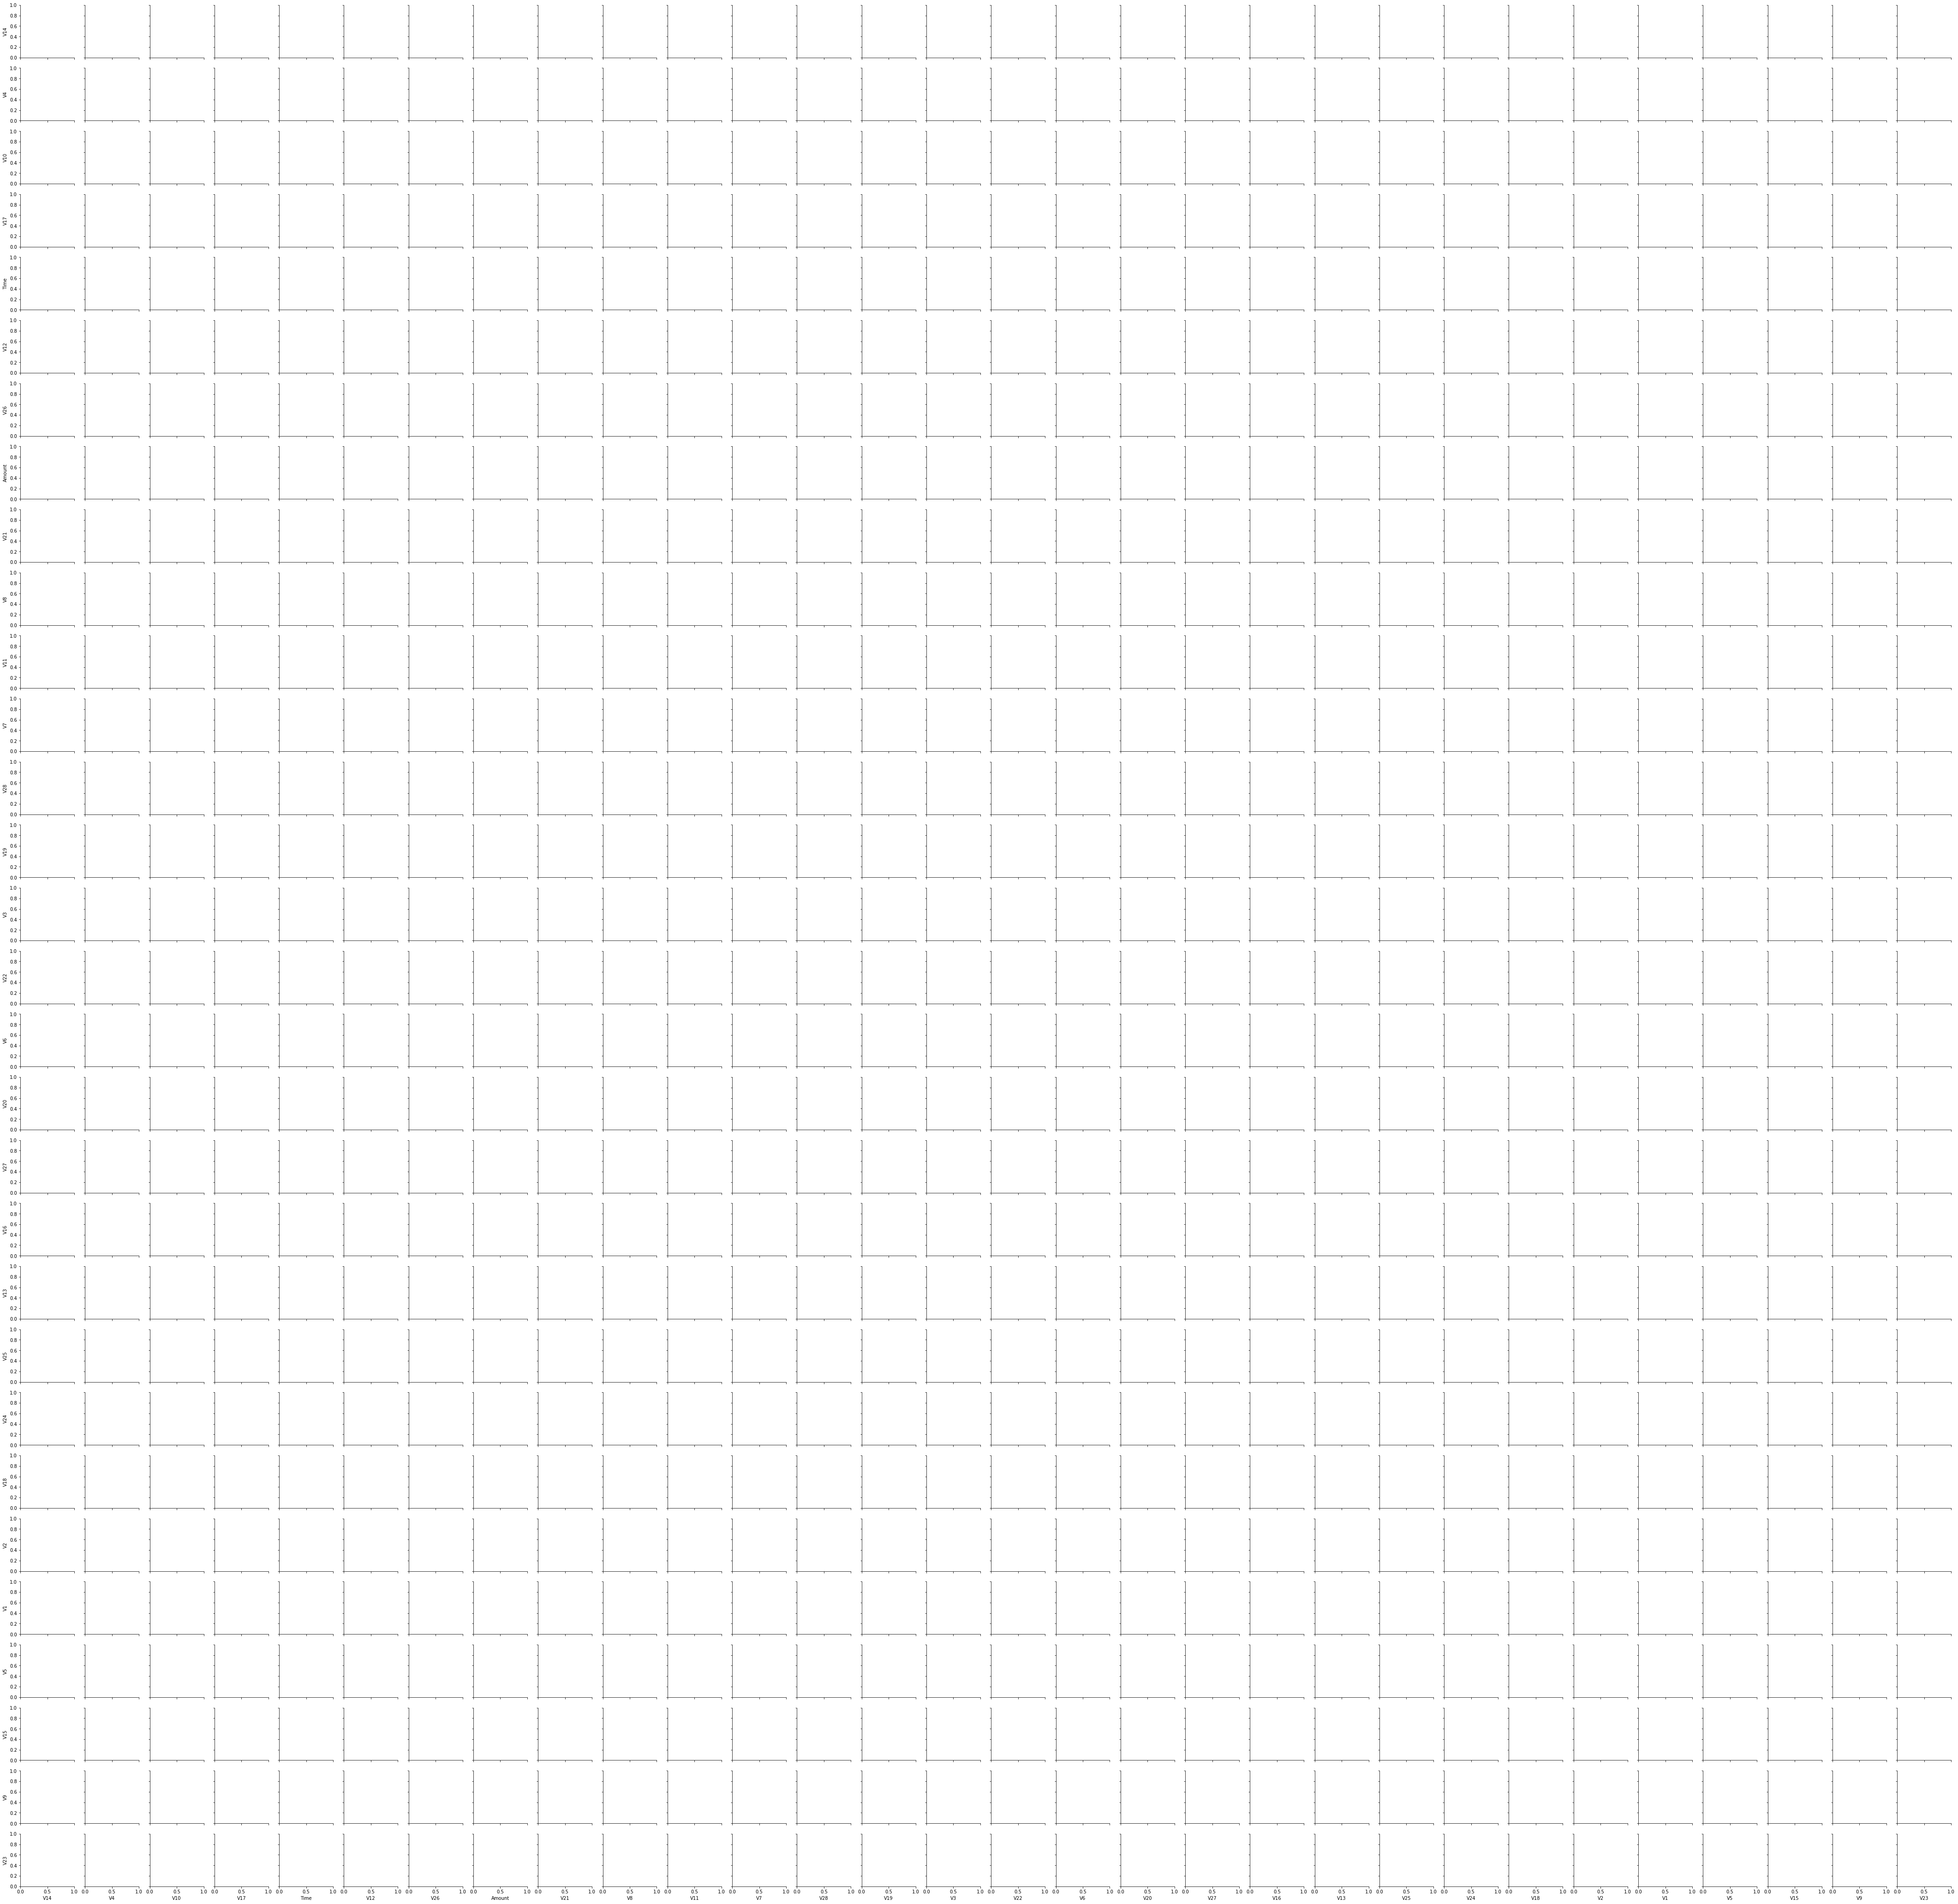

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cols =['V14', 'V4', 'V10', 'V17', 'Time', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()

plt.show()